# Pràctica 6: Arbres de Decisió


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](decission.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**




### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation.


In [38]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

dataset = pd.read_csv('car_evaluation.csv', header=0, delimiter=',')
y = dataset['class']
X = dataset.drop('class', axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [39]:
display(X)

display(y)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1382, 6), (346, 6))

<font color='blue'> Estan balancejats els conjunts de train i de test? Fes un print de les proporcions de cada classe a cadascun dels dos conjunts. </font>

In [41]:
# Estan balancejats els conjunts de train i de test? Fes un print de les proporcions de cada classe a cadascun dels dos conjunts

### RESPOSTA

print("Proporcions de cada classe a l'entrenament:")
print(y_train.value_counts(normalize=True))
print("\nProporcions de cada classe a la prova:")
print(y_test.value_counts(normalize=True))

Proporcions de cada classe a l'entrenament:
class
unacc   0.705
acc     0.218
good    0.042
vgood   0.035
Name: proportion, dtype: float64

Proporcions de cada classe a la prova:
class
unacc   0.679
acc     0.240
vgood   0.049
good    0.032
Name: proportion, dtype: float64


## A. Estructura dels Arbres de Decisió i codificació d'atributs

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [42]:
!pip install category_encoders

Aquest codi utilitza *LabelEncoder* de *scikit-learn* per transformar variables categòriques en valors numèrics, facilitant el seu ús en models de machine learning. Mitjançant un *defaultdict*, s'aplica un codificador independent a cada columna dels conjunts de dades d'entrenament i prova. També s'inclou la possibilitat d'invertir la transformació per recuperar els valors categòrics originals.

In [43]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)
print(encoders)

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))

# Inverse the encoded
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

print("\n X_train before LabelEncoder:")
print(X_train)
print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)

defaultdict(<class 'sklearn.preprocessing._label.LabelEncoder'>, {})

 X_train before LabelEncoder:
     buying  maint  doors persons lug_boot safety
107   vhigh  vhigh  5more    more      big   high
901     med  vhigh      3       4    small    med
1709    low    low  5more       2      big   high
706    high    med      4       2      med    med
678    high    med      3       2      med    low
...     ...    ...    ...     ...      ...    ...
1130    med    med      3    more      med   high
1294    med    low  5more    more      big    med
860    high    low  5more    more      med   high
1459    low   high      4       2    small    med
1126    med    med      3    more    small    med

[1382 rows x 6 columns]

 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706      

#### Limitacions del LabelEncoder
* Assignació basada en l'ordre: Com que el LabelEncoder es basa en l'ordre lèxicogràfic, no té en compte cap informació semàntica o d'importància numèrica en les etiquetes. Per exemple, si tens categories com ['baix', 'mitjà', 'alt'], no sabrà que "alt" hauria d'estar codificat com un número més gran que "mitjà" o "baix". Simplement les ordenarà com a text.
* Risc amb dades numèriques en forma de text: Si tens valors numèrics representats com a text (com '1', '2', '3', 'més'), el LabelEncoder tractarà aquests valors com cadenes de text i no com a números, la qual cosa pot portar a codificacions incorrectes (per exemple, '2' pot ser codificat abans que '10' perquè '2' ve abans que '10' en ordre lèxicogràfic).

<font color='red'> Quan les categories tenen un ordre jeràrquic o ordinal (com 'baix', 'mitjà', 'alt'), l'OrdinalEncoder és més adequat que el LabelEncoder. Aquest codificador et permet especificar l'ordre de les categories manualment, la qual cosa garanteix que s'assignin valors numèrics en l'ordre correcte. </font>

In [44]:
from sklearn.preprocessing import OrdinalEncoder

categories = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

ordinal_encoder_car = OrdinalEncoder(categories=[categories[col] for col in categories])

X_train_encoded = ordinal_encoder_car.fit_transform(X_train)
X_test_encoded = ordinal_encoder_car.transform(X_test)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=X_test.columns)


print("\n X_train before codification:")
print(X_train)
print("\n The result of transforming X_train with OrdinalEncoder:")
print(X_train_encoded_df)




 X_train before codification:
     buying  maint  doors persons lug_boot safety
107   vhigh  vhigh  5more    more      big   high
901     med  vhigh      3       4    small    med
1709    low    low  5more       2      big   high
706    high    med      4       2      med    med
678    high    med      3       2      med    low
...     ...    ...    ...     ...      ...    ...
1130    med    med      3    more      med   high
1294    med    low  5more    more      big    med
860    high    low  5more    more      med   high
1459    low   high      4       2    small    med
1126    med    med      3    more    small    med

[1382 rows x 6 columns]

 The result of transforming X_train with OrdinalEncoder:
      buying  maint  doors  persons  lug_boot  safety
0      3.000  3.000  3.000    2.000     2.000   2.000
1      1.000  3.000  1.000    1.000     0.000   1.000
2      0.000  0.000  3.000    0.000     2.000   2.000
3      2.000  1.000  2.000    0.000     1.000   1.000
4      2.000  1.

## Creació i visualització d'arbres de decisió

Sklearn ens dona una versió bàsica dels algorismes de generació d'arbres de decisió [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Caldrà treballar sobre els diferents paràmetres per a obtenir la millor solució per, almenys, un dels problemes plantejats.

Per visualitzar els arbres hi ha diferents possibilitats que podeu usar [exemples](https://mljar.com/blog/visualize-decision-tree/)

Aquest codi utilitza el classificador d'arbres de decisió de scikit-learn per ajustar un model als dades codificades (encoded_X_train_2) i les respectives etiquetes (y_train). Després de crear l'objecte DecisionTreeClassifier, s'entrena el model amb les dades d'entrenament.

In [45]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(encoded_X_train_2, y_train)
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

Visualitzem l'arbre:

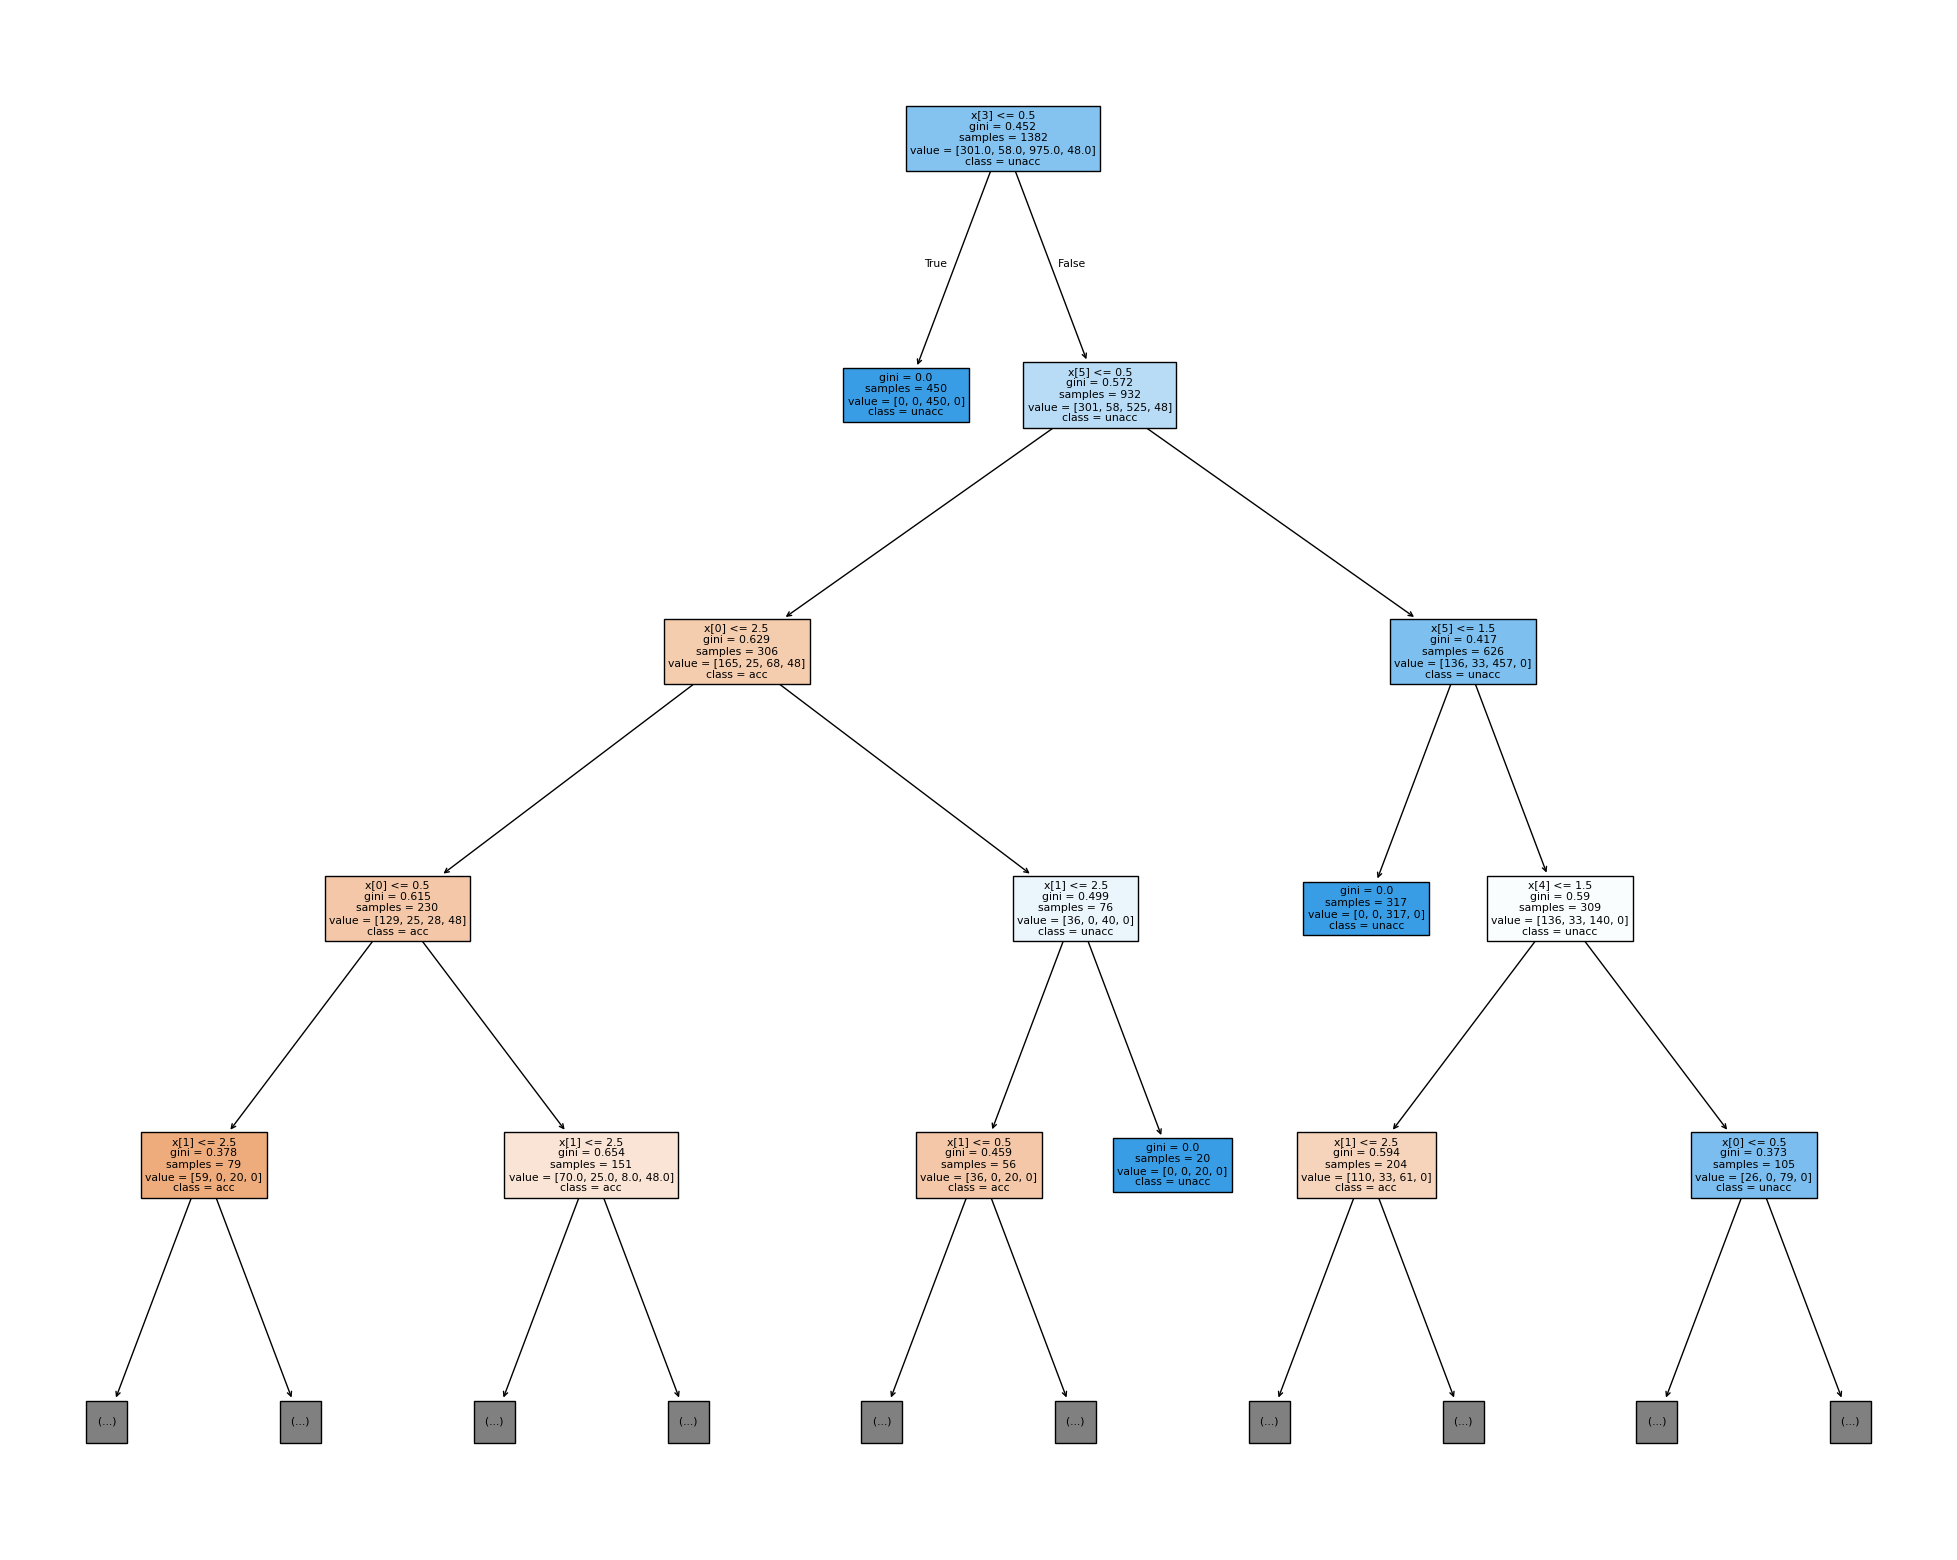

In [48]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, max_depth=4, class_names=clf.classes_, filled=True)
plt.show()


#### Simbolisme dels colors en l'arbre de decisió

En un arbre de decisió, els colors utilitzats per omplir els nodes tenen un significat important que ajuda a interpretar els resultats de manera visual:

* Colors Diferents per a Cada Classe: Cada color representa una classe específica del model de classificació. Això permet als observadors identificar ràpidament quines classes són predominen en diferents parts de l'arbre.

* Intensitat del Color: La intensitat del color en els nodes indica la proporció de mostres que pertanyen a cada classe dins d'un node. Un color més intens significa que una classe és més predominant en aquell node, mentre que un color més suau indica una menor proporció de la classe.

## B. Selecció de mesures d'atributs
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

Example https://analyticsindiamag.com/understanding-the-maths-behind-the-gini-impurity-method-for-decision-tree-split/

### Entropy

En aquest codi, primer es codifiquen les dades categòriques de les variables predictives i de la variable objectiu utilitzant LabelEncoder. Les dades d'entrenament i de test es transformen per aplicar-les a un model de classificació.

Després, es defineixen uns paràmetres de cerca per entrenar un arbre de decisió (DecisionTreeClassifier) amb el criteri de "entropy" per calcular la millor divisió. Mitjançant la tècnica de validació creuada (GridSearchCV), es busquen els millors hiperparàmetres entre diverses combinacions per optimitzar el rendiment del model. Finalment, es guarda el millor estimador obtingut.

<font color="blue"> Fes servir *GridSearchCV* per buscar la millor combinació de paràmetres per un *DecisionTreeClassifier* i agafa el millor estimador. </font>

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

X_train_encoded = ordinal_encoder_car.fit_transform(X_train)
X_test_encoded = ordinal_encoder_car.transform(X_test)

parameters= {'criterion':['entropy'],'max_depth' : [2,4,6,8,10,12]  ,'splitter':["best","random"],'min_samples_split':[2,3,4,6,7]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train_encoded, y_train)
estimator_entropy = grid_search_cv.best_estimator_

grid_search_cv.fit(X_train_encoded, y_train)
estimator_entropy = grid_search_cv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [13]:
print(f"Best accuracy for hyperparameters search over train is {estimator_entropy.score(X_train_encoded,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {estimator_entropy.score(X_test_encoded,y_test)}")

Best accuracy for hyperparameters search over train is 1.0
Best accuracy for hyperparameters search over test is 0.9653179190751445


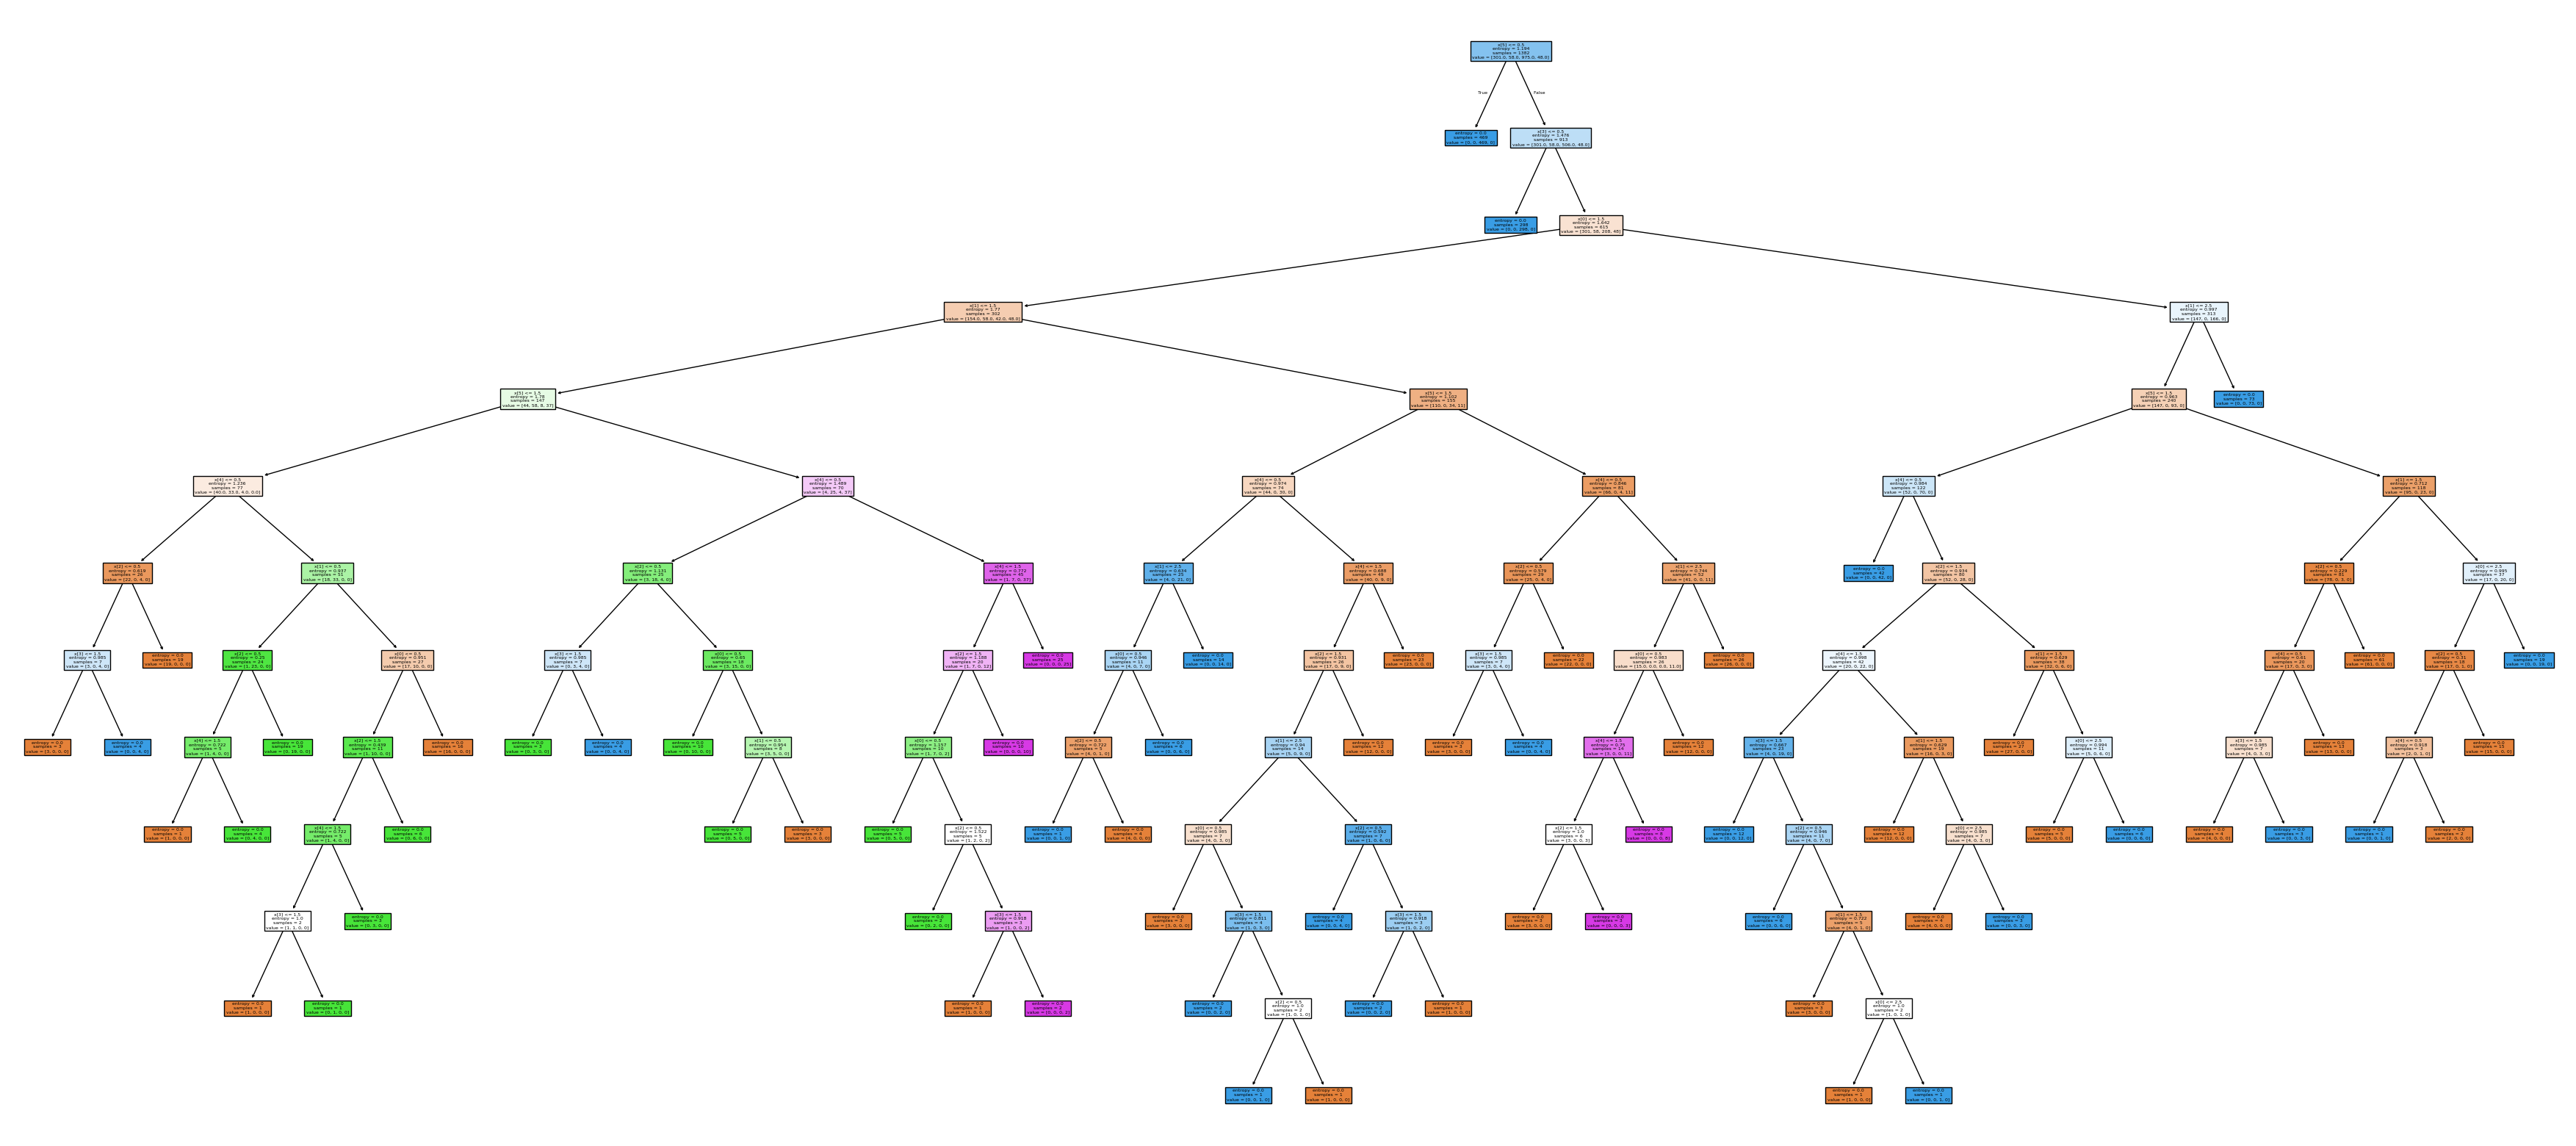

In [14]:
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(estimator_entropy, filled=True)

Aquest codi calcula la importància de les característiques d'un model d'arbre de decisió entrenat amb el criteri "entropy". Primer, s'obtenen les importàncies de les característiques mitjançant estimator_entropy.feature_importances_ i es reordenen segons la seva rellevància. 

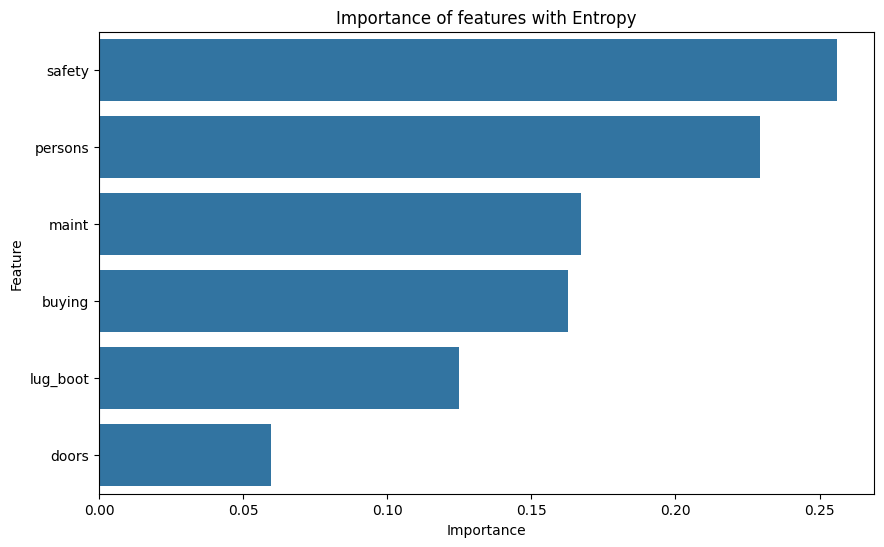

In [15]:
importances = estimator_entropy.feature_importances_
features = dataset.columns[:-1]

indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Importance of features with Entropy")
plt.show()

Com es pot observar, el *DecisionTreeClassifier* entrenat amb *Entropy* dóna més importància a la variable *safety*. 

<font color='blue'> Podriem aconseguir el mateix rendiment sense aquesta columna? Elimina *safety* de *X_train* i *X_test*, entrena el classificador i treu l'accuracy. </font>

*Recorda que X_train i X_test són un dataframe de la llibreria Pandas*

In [16]:
X_train_nosafety = X_train.drop('safety', axis="columns")
X_test_nosafety = X_test.drop('safety', axis="columns")

## Redefinim el OrdinalEncoder
categories_nosafety = categories.copy()
categories_nosafety.pop('safety', None)
ordinal_encoder_car_nosafety = OrdinalEncoder(categories=[categories_nosafety[col] for col in categories_nosafety])

X_train_encoded_nosafety = ordinal_encoder_car_nosafety.fit_transform(X_train_nosafety)
X_test_encoded_nosafety = ordinal_encoder_car_nosafety.transform(X_test_nosafety)

parameters= {'criterion':['entropy'],'max_depth' : [2,4,6,8,10,12]  ,'splitter':["best","random"],'min_samples_split':[2,3,4,6,7]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train_encoded_nosafety, y_train)
estimator_entropy = grid_search_cv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [17]:
print(f"Best accuracy for hyperparameters search over train is {estimator_entropy.score(X_train_encoded_nosafety,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {estimator_entropy.score(X_test_encoded_nosafety,y_test)}")

Best accuracy for hyperparameters search over train is 0.7554269175108539
Best accuracy for hyperparameters search over test is 0.708092485549133


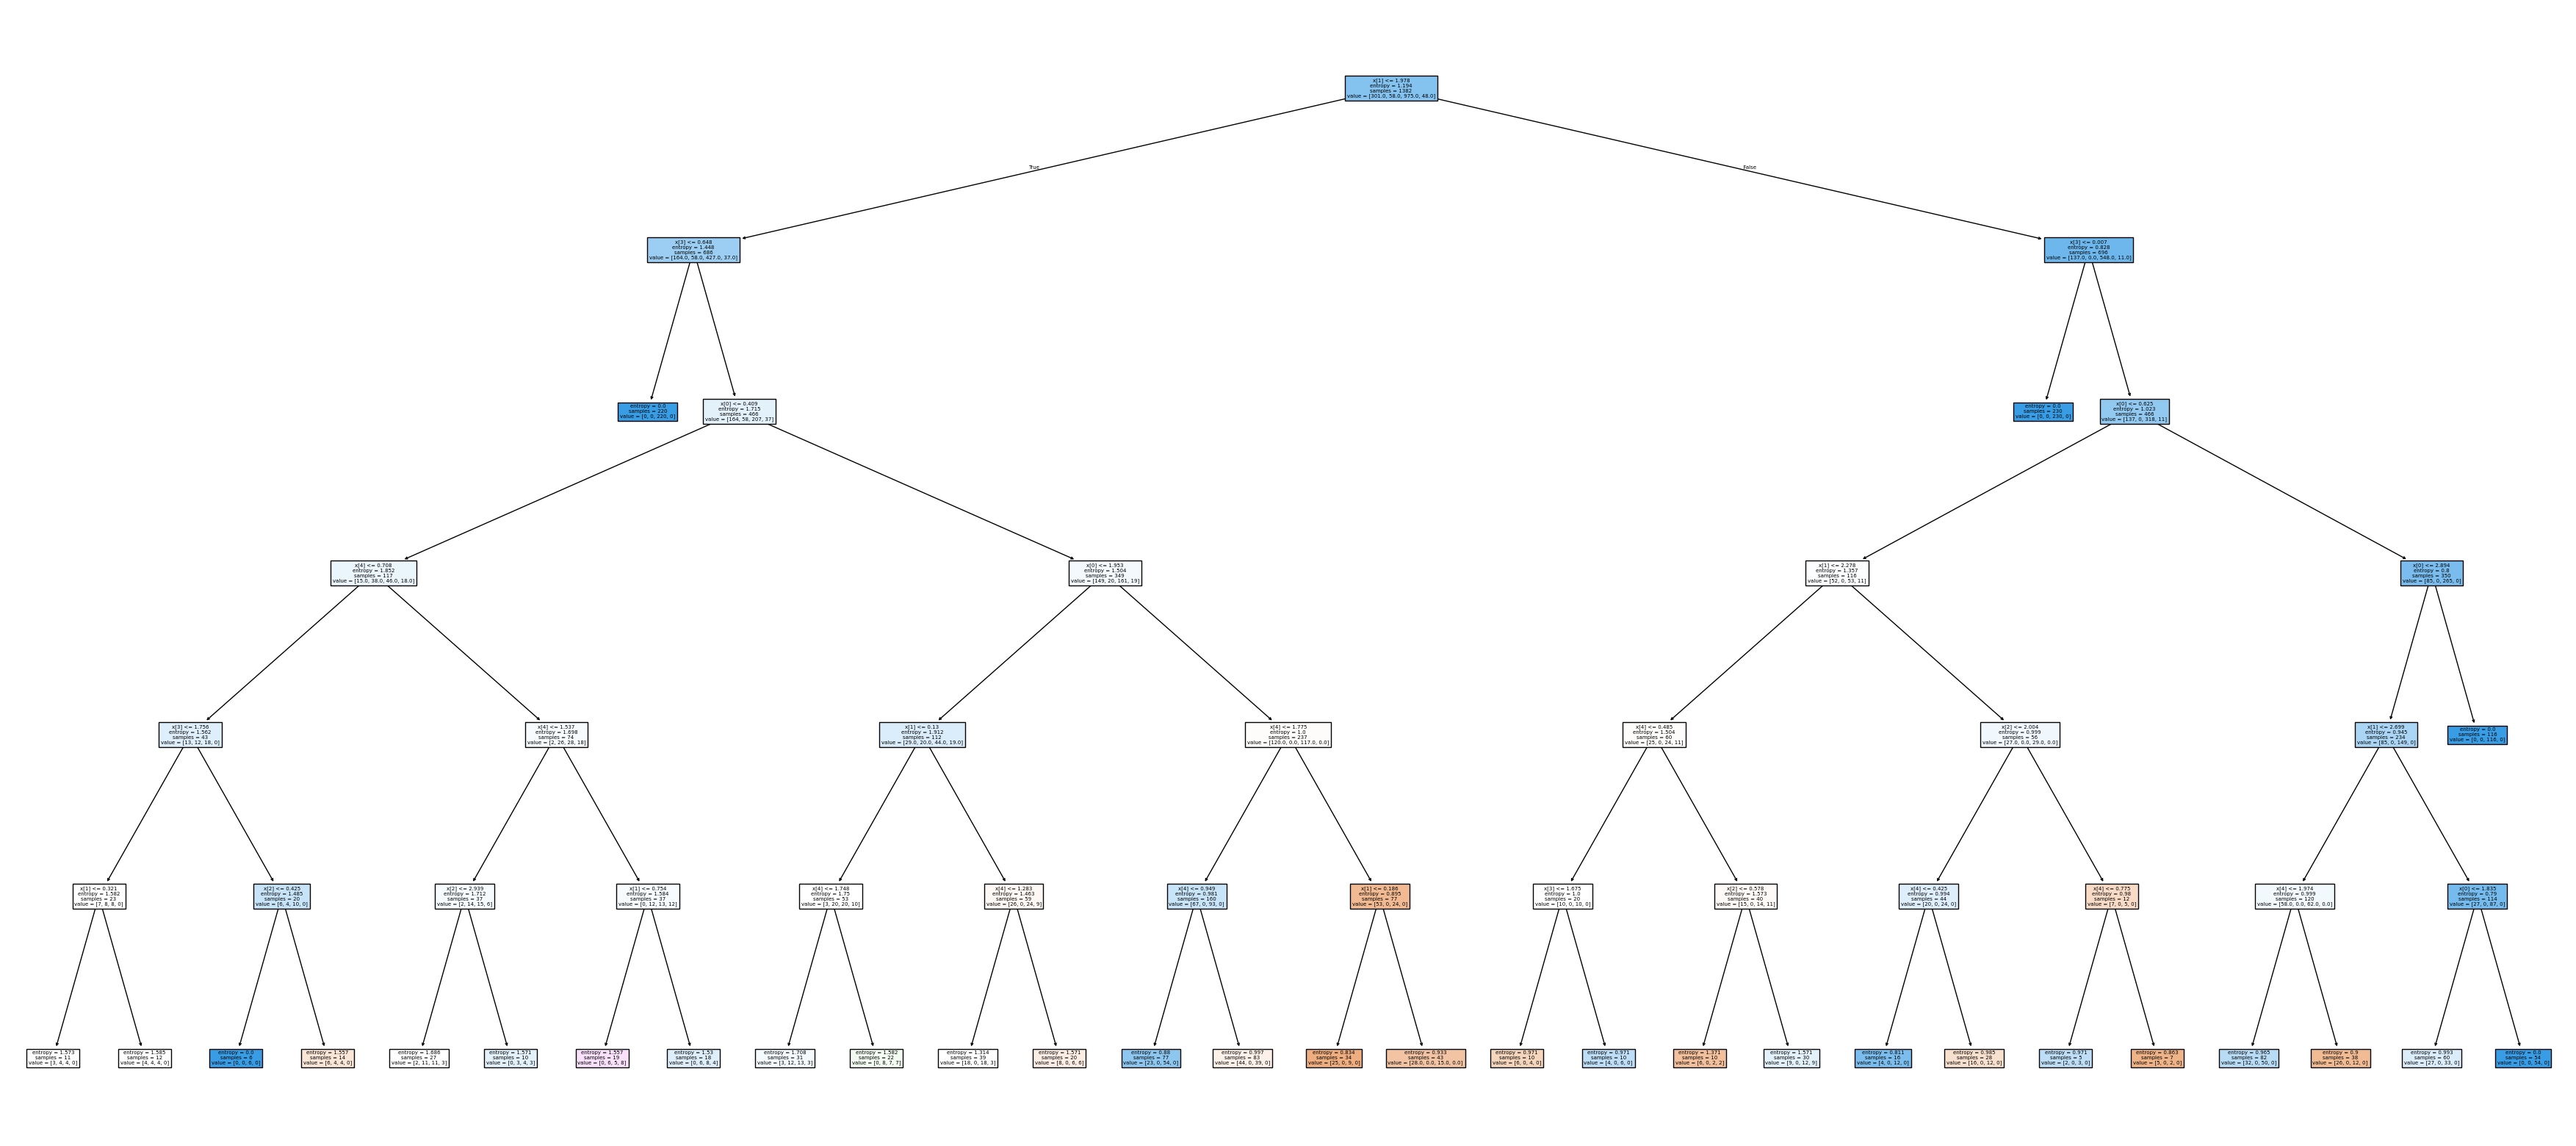

In [18]:
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(estimator_entropy, filled=True)

## Gini

<font color='blue'> Podem entrenar un DecisionTreeClassifier amb una mesura diferent de l'entropia? Seguint el mateix procediment anterior, transforma les dades amb el codificador i utilitza *GridSearchCV* per trobar la millor combinació de paràmetres que maximitzin l'accuracy del classificador utilitzant Gini com a mesura en la construcció de l'arbre </font>

In [19]:
# Podem entrenar un DecisionTreeClassifier amb una mesura diferent de l'entropia? Seguint el mateix procediment anterior, transforma les dades amb el codificador i utilitza *GridSearchCV* per trobar la millor combinació de paràmetres que maximitzin l'accuracy del classificador utilitzant Gini com a mesura en la construcció de l'arbre

### RESPOSTA

parameters = {
    'criterion': ['gini'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4, 6, 7],
    'splitter': ['best', 'random']
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train_encoded, y_train)
estimator_gini = grid_search_cv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [20]:
print(f"Best accuracy for hyperparameters search over train is {estimator_gini.score(X_train_encoded,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {estimator_gini.score(X_test_encoded,y_test)}")

Best accuracy for hyperparameters search over train is 0.9992764109985528
Best accuracy for hyperparameters search over test is 0.9710982658959537


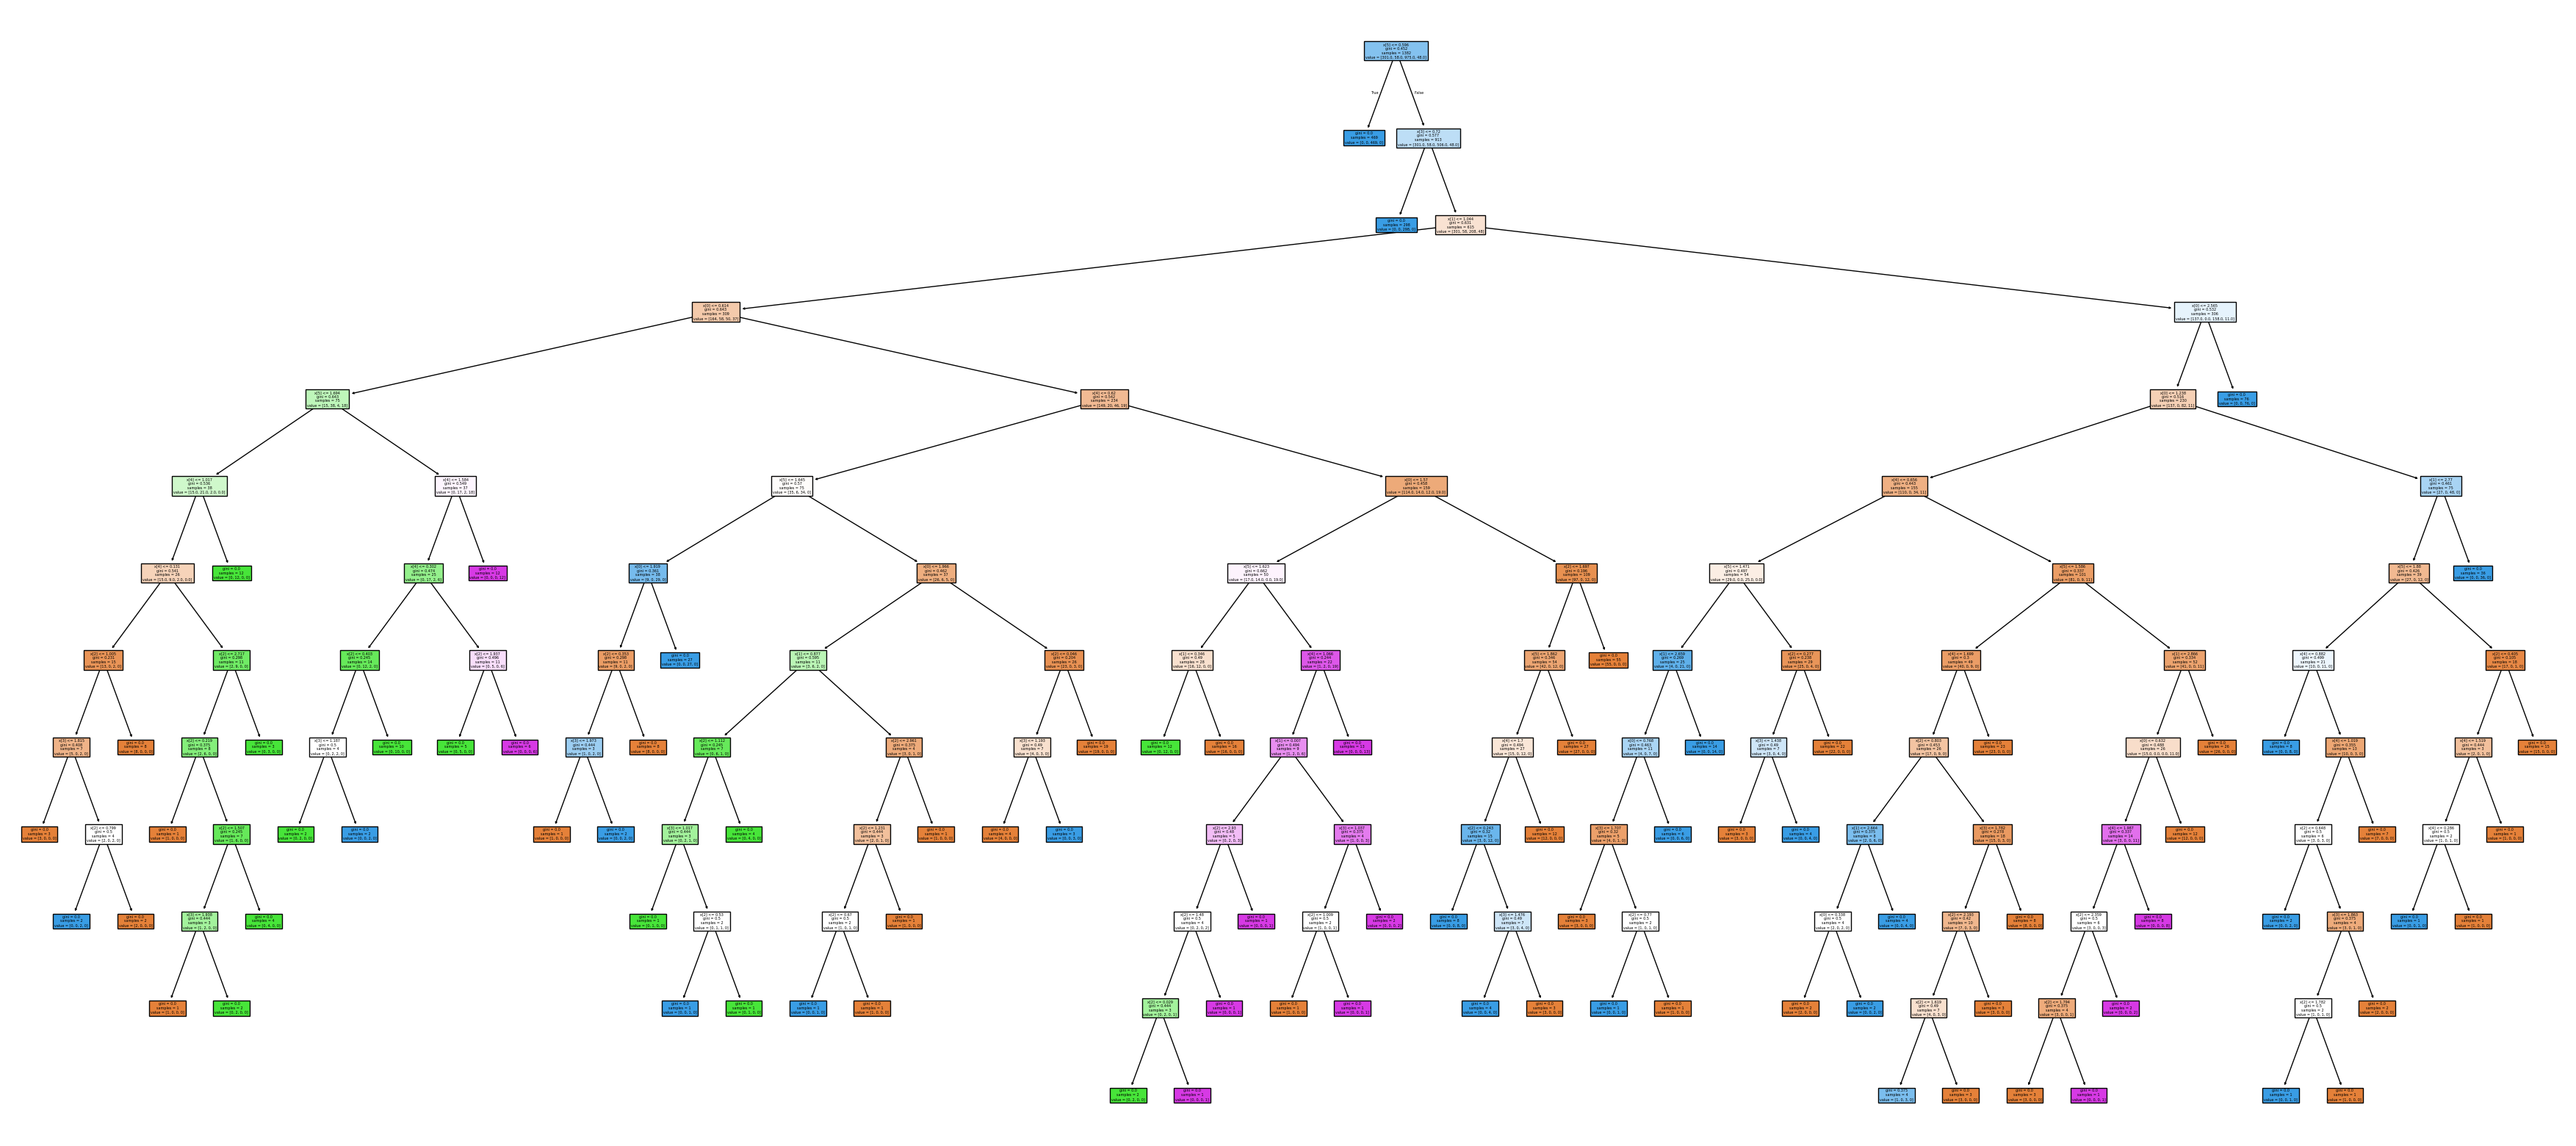

In [21]:
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(estimator_gini, filled=True)

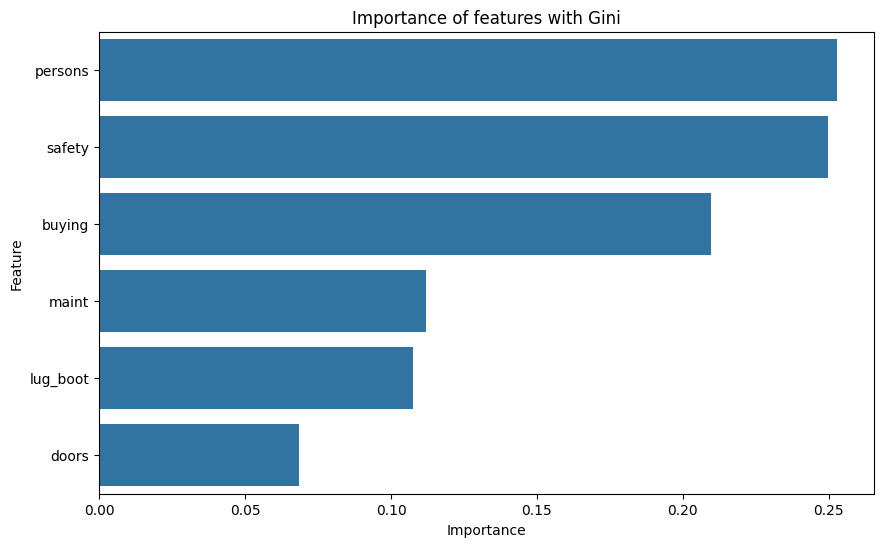

In [22]:
importances = estimator_gini.feature_importances_
features = dataset.columns[:-1]

indices = np.argsort(importances)[::-1]

# Crear un dataframe para visualizar
feature_importance = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})

# Visualizar las importancias de las características
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Importance of features with Gini")
plt.show()

## C. Pruning

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada [cross validations], comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.


Aquest codi entrena un arbre de decisió amb el classificador DecisionTreeClassifier sense aplicar cap tècnica de poda. S'ajusta el model als dades d'entrenament (X_train_encoded i y_train) i es calcula la precisió tant en el conjunt d'entrenament com en el de prova. Finalment, es visualitza l'arbre de decisió complet, mostrant la seva estructura sense limitacions.

Best accuracy for hyperparameters search over train is 1.0
Best accuracy for hyperparameters search over test is 0.9624277456647399


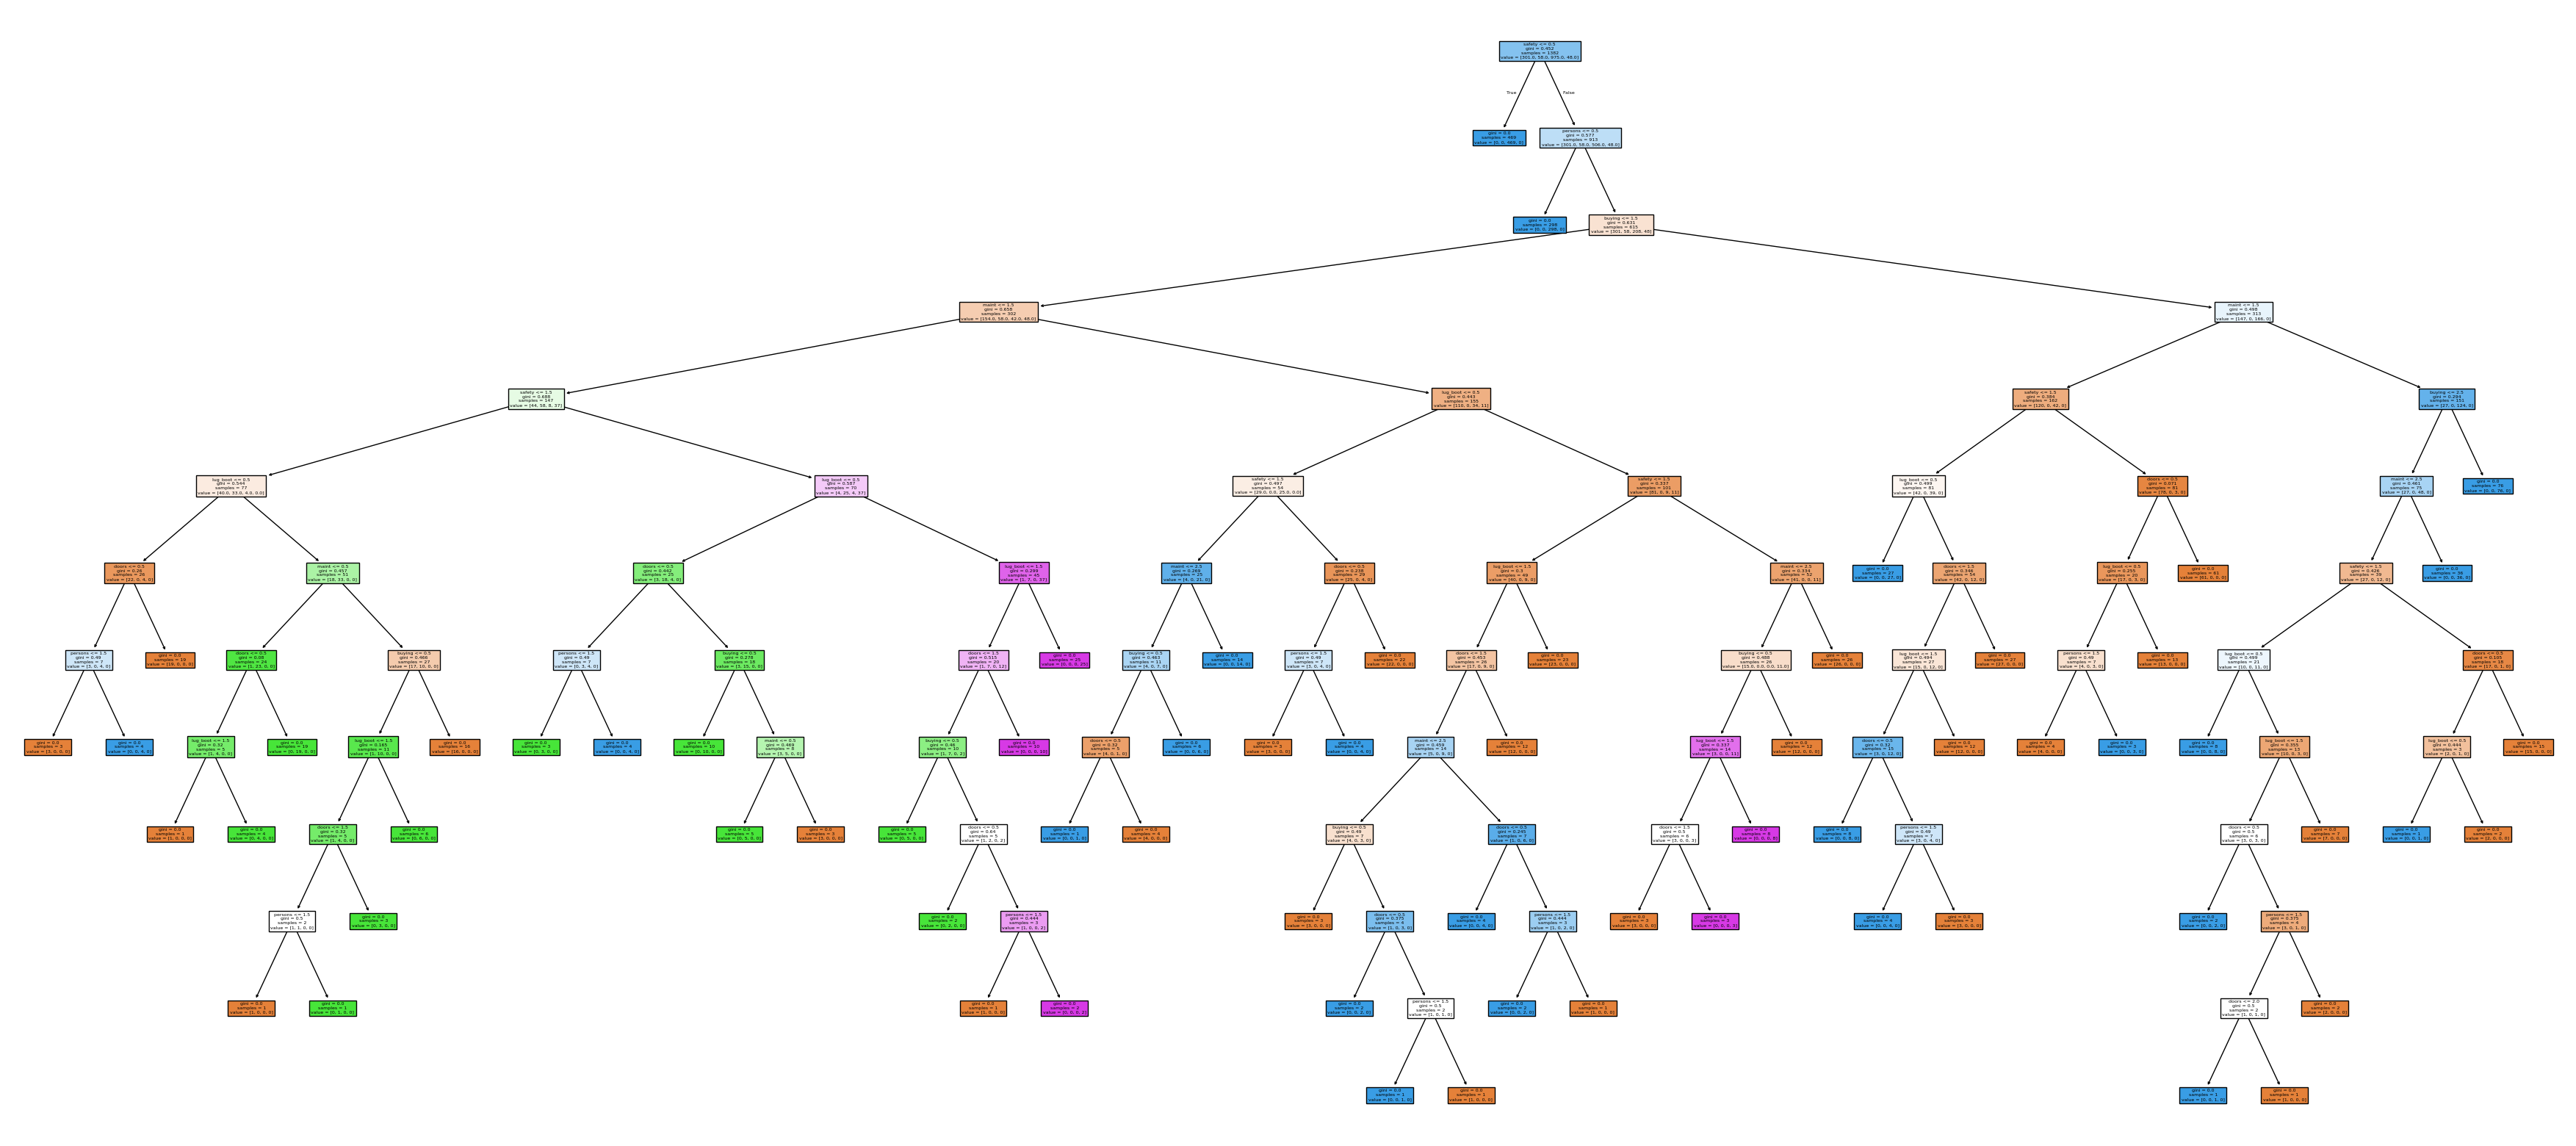

In [23]:
tree_no_pruning = DecisionTreeClassifier(criterion='gini', random_state=23)
tree_no_pruning.fit(X_train_encoded,y_train)

print(f"Best accuracy for hyperparameters search over train is {tree_no_pruning.score(X_train_encoded,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {tree_no_pruning.score(X_test_encoded,y_test)}")
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(tree_no_pruning, filled=True, feature_names=dataset.columns[:-1])

## Pre-poda
Aquest codi entrena un arbre de decisió amb tècniques de poda prèvia mitjançant el classificador DecisionTreeClassifier. Es limita la profunditat de l'arbre a 4, es fixa un mínim de 10 mostres per dividir i 5 mostres per fulla, així com un llindar d'impuresa mínima de 0.01. Això permet controlar la complexitat del model i millorar la seva capacitat de generalització. 

Best accuracy for hyperparameters search over train is 0.8531114327062229
Best accuracy for hyperparameters search over test is 0.8410404624277457


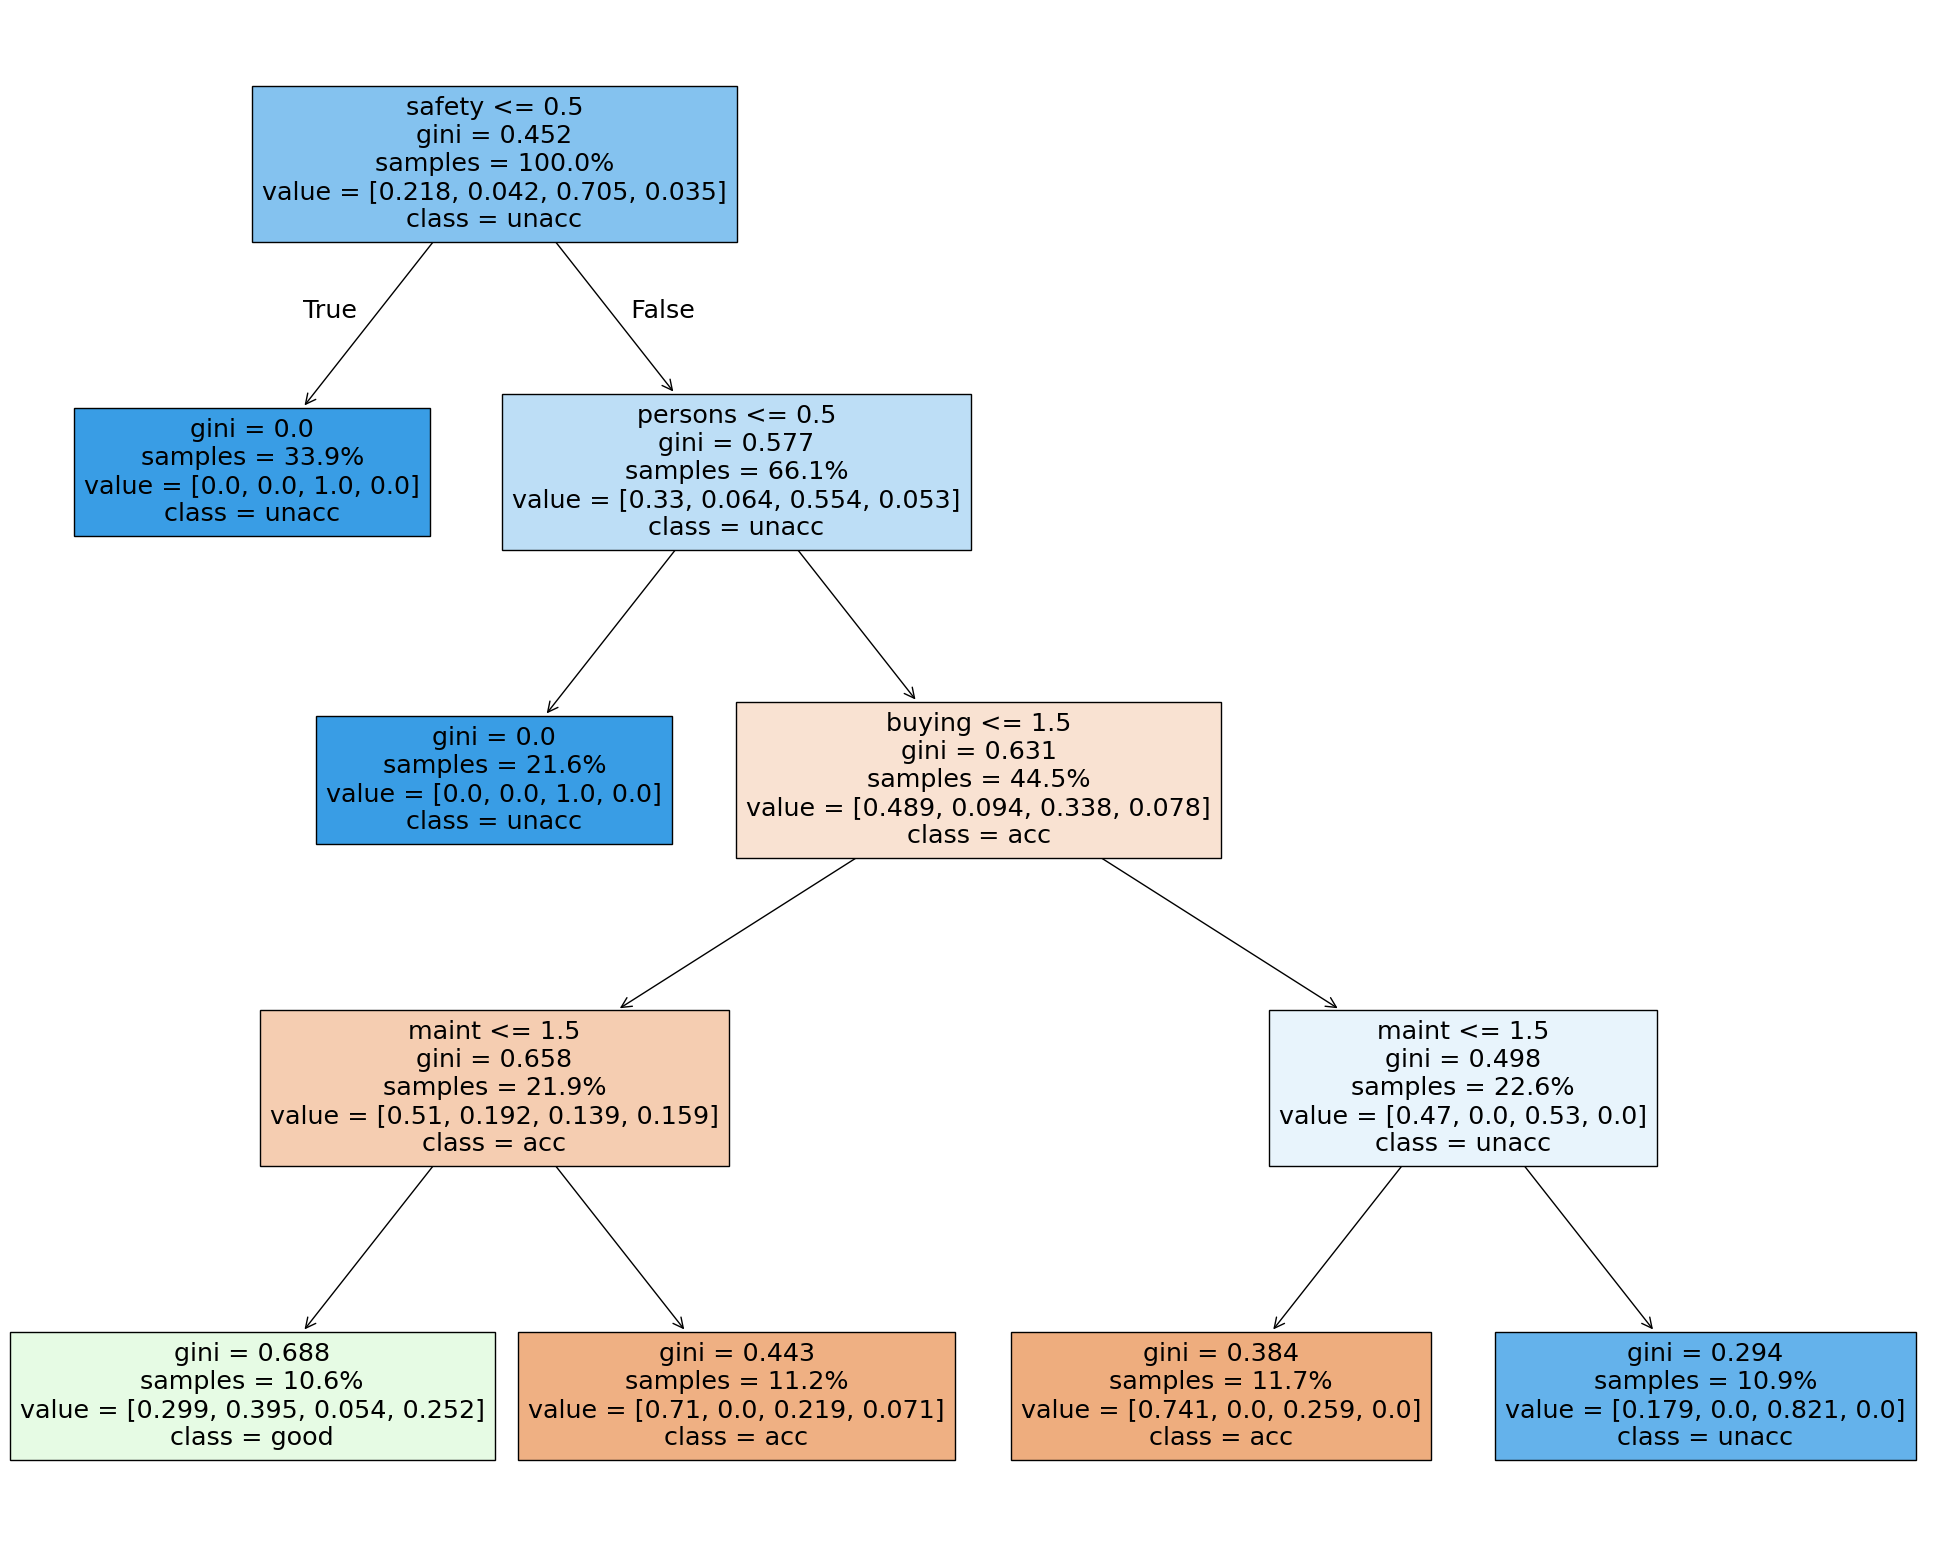

In [24]:
tree_pre_pruning = DecisionTreeClassifier(
    max_depth=4,  # Limitant la profunditat de l'arbre
    min_samples_split=10,  # Mínim nombre de mostres per dividir
    min_samples_leaf=5,    # Mínim nombre de mostres en una fulla
    min_impurity_decrease=0.01,  #Llindar per reduir impureses
    random_state=23
)
tree_pre_pruning.fit(X_train_encoded,y_train)

print(f"Best accuracy for hyperparameters search over train is {tree_pre_pruning.score(X_train_encoded,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {tree_pre_pruning.score(X_test_encoded,y_test)}")


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_pre_pruning, feature_names=X_train.columns, class_names=tree_pre_pruning.classes_, filled=True, proportion=True)


<font color='red'> Com es pot apreciar amb l'accuracy, el model amb pre-poda és pitjor que el model sense poda. Això és perquè els hiperparàmetres especificats no han estat els més correctes, provocant que l'arbre sigui massa simple i classifiqui pitjor que el que no té cap restricció.</font>

Aquest codi utilitza GridSearchCV per optimitzar els hiperparàmetres d'un arbre de decisió després que el model amb poda prèvia no hagi obtingut resultats millors que el model sense poda. Es defineixen diversos paràmetres, com la profunditat màxima, el mínim de mostres per dividir i per fulla, així com el llindar d'impuresa mínima. L'objectiu és trobar la combinació d'hiperparàmetres que maximitzi la precisió del model. Després d'ajustar el model amb una validació creuada de 3 folds, es mostren els millors paràmetres trobats, permetent així millorar el rendiment del model d'arbre de decisió.

In [28]:
parameters = {
    'criterion': ['gini'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4, 6, 7],
    'min_samples_leaf': [1, 3, 5, 7],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.2],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=1, cv=3, n_jobs=14)

grid_search_cv.fit(X_train_encoded,y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=14,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 4, 6, 7],
                         'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1]},
             verbose=1)

<font color='blue'> Segons *GridSearchCV*, quins són els millors paràmetres per entrenar el *DecisionTreeClassifier*? Entrena el *DecisionTreeClassifier* utilitzant aquests paràmetres, printa l'accuracy i fes un plot de l'arbre. </font>

The best params are: [{'criterion': 'gini', 'max_depth': 12, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0}]
Best accuracy for hyperparameters search over train is 1.0
Best accuracy for hyperparameters search over test is 0.9653179190751445


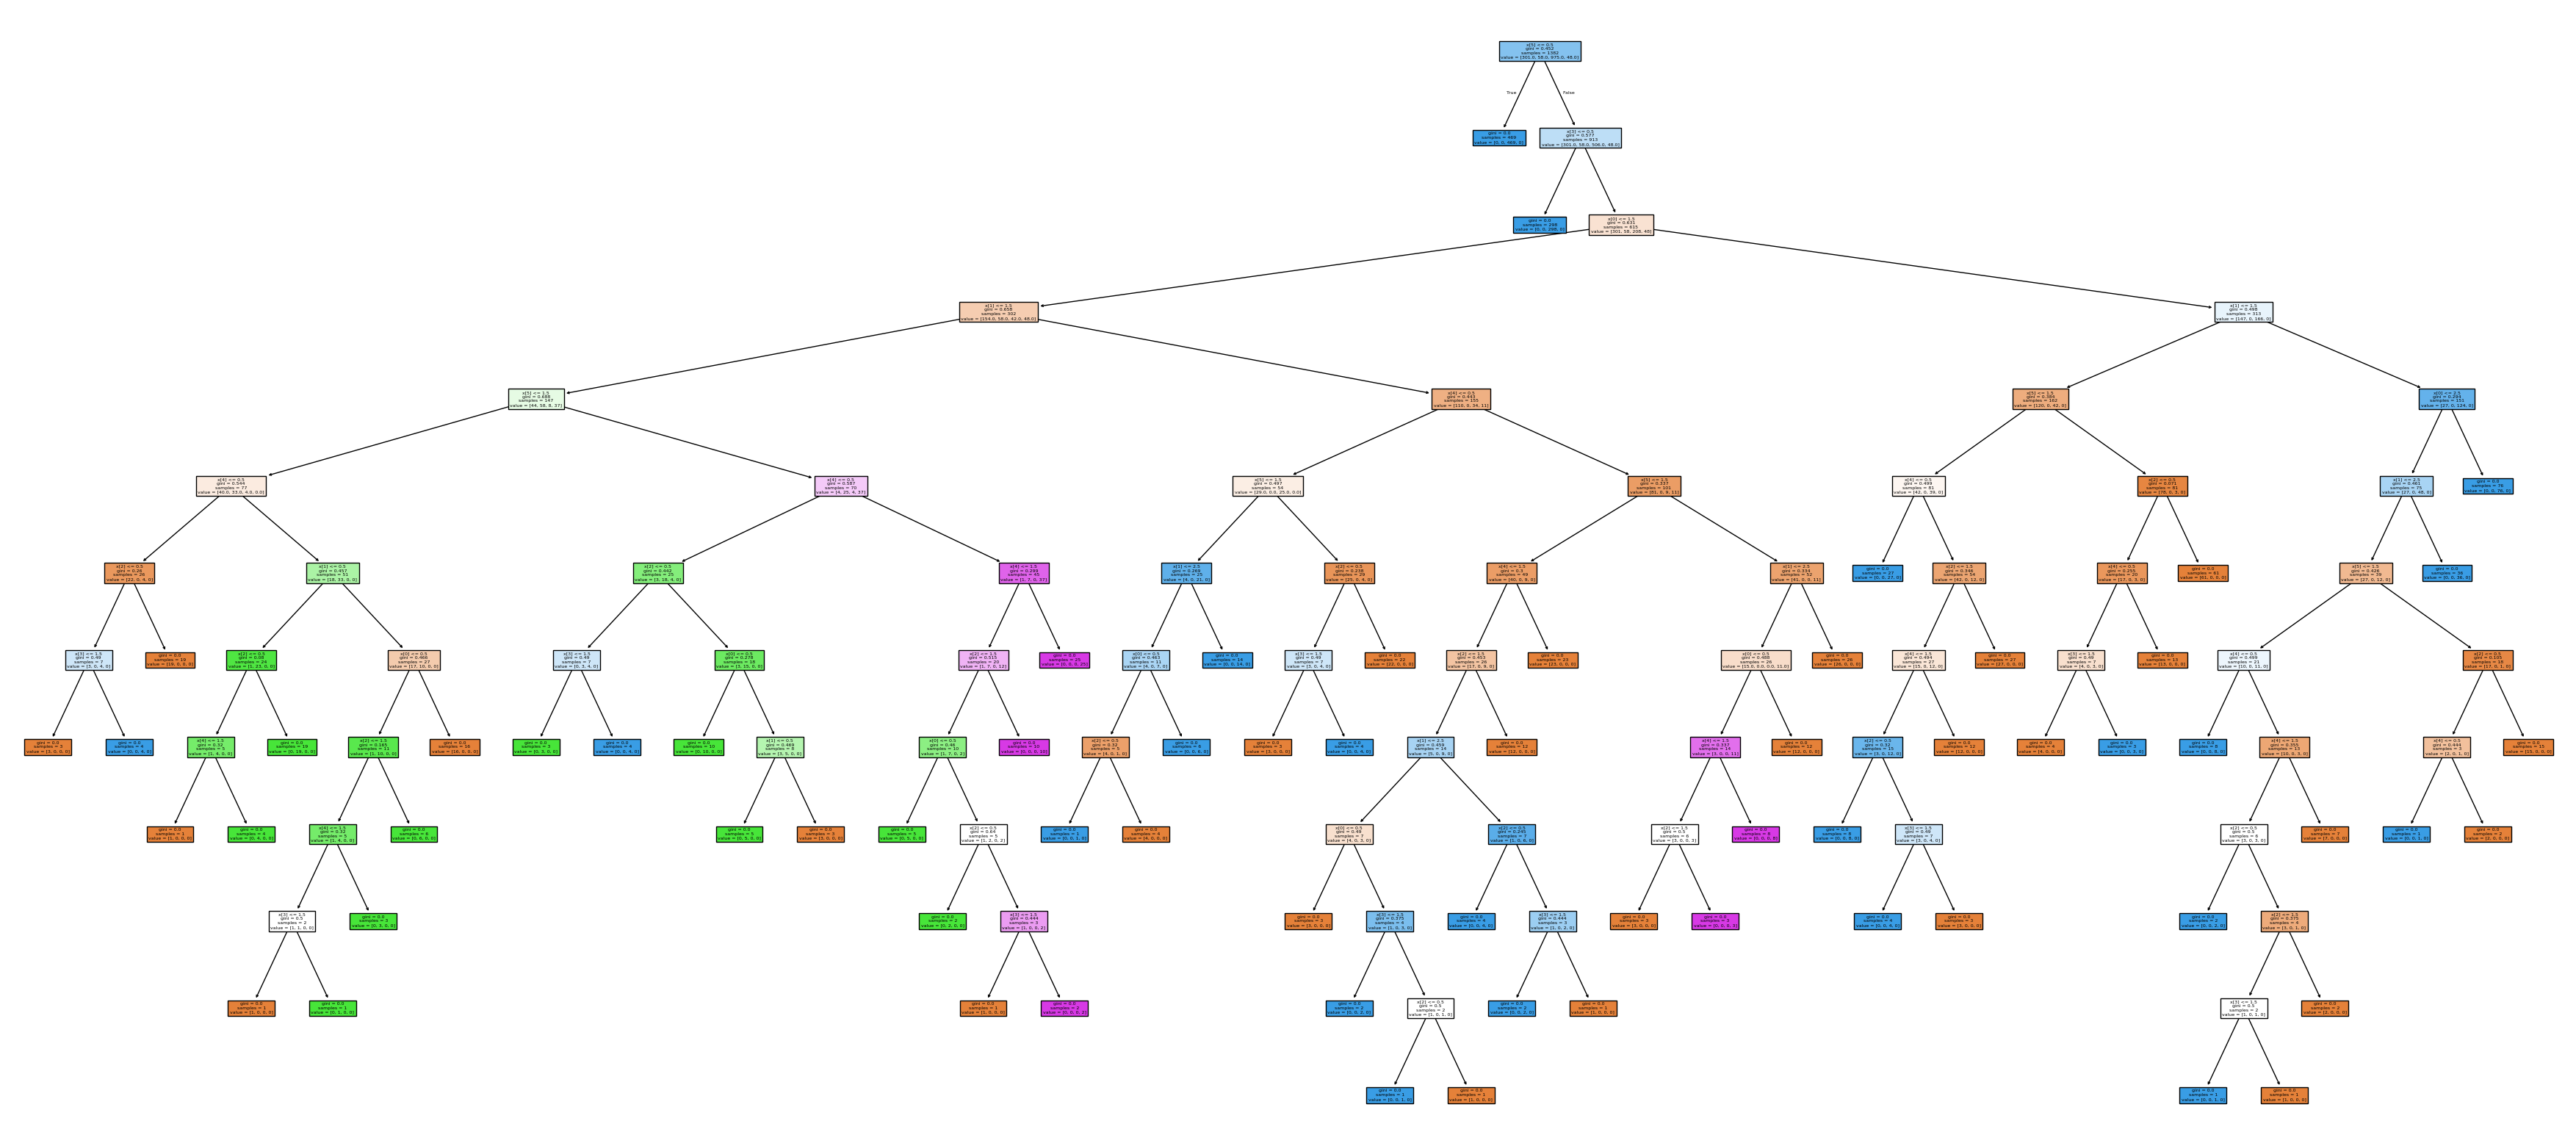

In [29]:
#print(grid_search_cv.__dict__)

best_params = [grid_search_cv.best_params_][:2]
print("The best params are:", best_params)

tree_pre_pruning = DecisionTreeClassifier(random_state=42)    
tree_pre_pruning.fit(X_train_encoded,y_train)

print(f"Best accuracy for hyperparameters search over train is {tree_pre_pruning.score(X_train_encoded,y_train)}")
print(f"Best accuracy for hyperparameters search over test is {tree_pre_pruning.score(X_test_encoded,y_test)}")

fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(tree_pre_pruning, filled=True)

<font color='blue'> Completa el següent codi per a que mostri informació rellevant sobre un arbre de decisió sense poda (tree_no_pruning). Has d'omplir els buits en {} amb les propietats i mètodes correctes que corresponguin a: </font>

* <font color='blue'>El nombre total de nodes a l'arbre.
* <font color='blue'>La profunditat màxima de l'arbre.
* <font color='blue'>El nombre de fulles (nodes terminals).
* <font color='blue'>L'accuracy (precisió) del model en el conjunt d'entrenament.
* <font color='blue'> L'accuracy (precisió) del model en el conjunt de prova.

In [30]:
#print(f"Arbre sense poda: Número de nodes = {???}, Profunditat màxima = {???}, Número de fulles = {???}, Accuracy train = {???}, Accuracy test = {???} ")
#print(f"Arbre amb pre-poda: Número de nodes = {???}, Profunditat màxima = {???}, Número de fulles = {???},  Accuracy train = {???}, Accuracy test= {???}")


SyntaxError: f-string: expecting a valid expression after '{' (3294428205.py, line 1)

### Interpretació dels resultats

* Complexitat: L'arbre sense poda és més complex, amb més nodes i més profunditat, cosa que podria significar un sobreajustament a les dades d'entrenament.
* Capacitat de generalització: L'arbre podat, encara menys complex, hauria de tenir una millor capacitat de generalització, amb un millor equilibri entre entrenament i prova.
* Eficiència: Un arbre més petit és també més eficient en termes de temps d'inferència i emmagatzematge, cosa que pot ser útil en aplicacions en temps real.

## Post poda
La post-poda (post-pruning) és una tècnica utilitzada en els arbres de decisió per reduir la complexitat del model i millorar-ne la capacitat de generalització. La post-poda s'aplica després de construir l'arbre complet, i després es retallen branques basant-se en el seu rendiment.

En el cas de la post-poda, s'utilitza un paràmetre anomenat ccp_alpha (Cost Complexity Pruning Alpha) que controla la quantitat de poda. Quan ccp_alpha és petit, l'arbre reté més branques i és més complex, mentre que valors més alts d'alpha produeixen un arbre més petit i senzill, eliminant més branques.

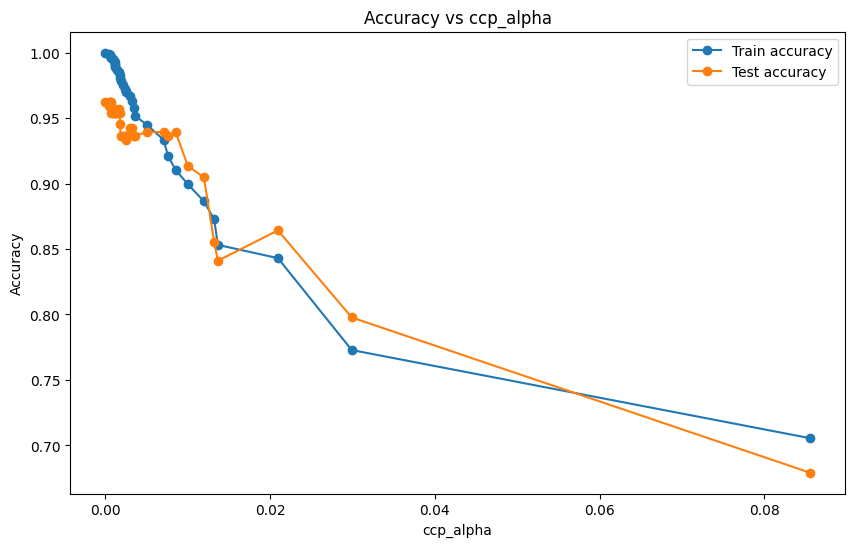

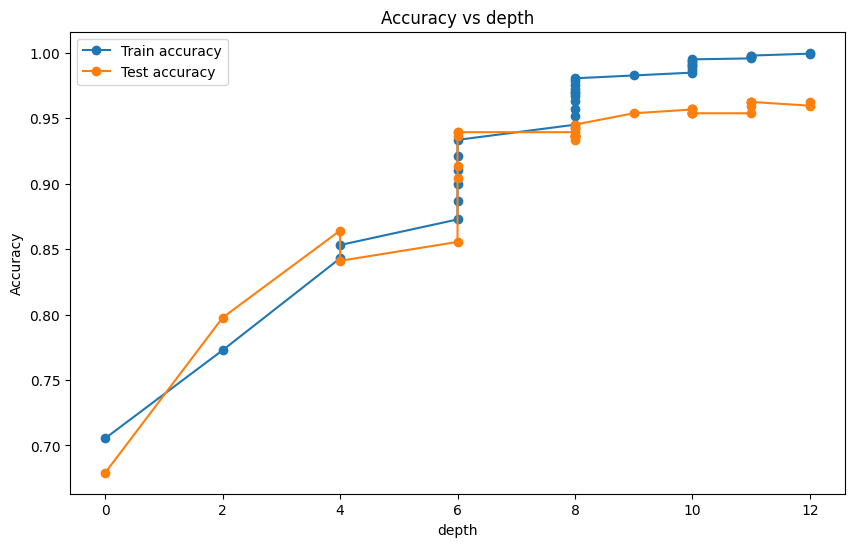

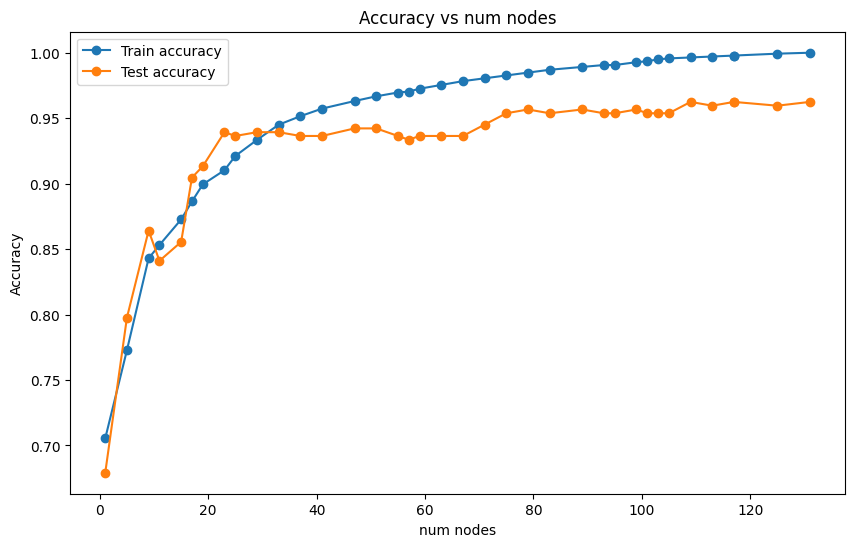

In [31]:
from sklearn.metrics import accuracy_score

path = tree_no_pruning.cost_complexity_pruning_path(X_train_encoded, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=23, ccp_alpha=ccp_alpha)
    clf.fit(X_train_encoded, y_train)
    trees.append(clf)

train_scores = [accuracy_score(y_train, clf.predict(X_train_encoded)) for clf in trees]
test_scores = [accuracy_score(y_test, clf.predict(X_test_encoded)) for clf in trees]
depths = [clf.tree_.max_depth for clf in trees]
nodes = [clf.tree_.node_count for clf in trees]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Train accuracy', marker='o')
plt.plot(ccp_alphas, test_scores, label='Test accuracy', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs ccp_alpha')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train accuracy', marker='o')
plt.plot(depths, test_scores, label='Test accuracy', marker='o')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs depth')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(nodes, train_scores, label='Train accuracy', marker='o')
plt.plot(nodes, test_scores, label='Test accuracy', marker='o')
plt.xlabel('num nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs num nodes')
plt.show()

<font color='blue'> Observant les gràfiques, en quin punt creieu que es genera el millor model? Fes un plot de l'arbre del model més òptim. </font>

In [32]:
### RESPOSTA

En el següent codi es generen dues gràfiques:
* A la primera, es mostra com varia la profunditat de l'arbre de decisió a mesura que augmentes el valor de ccp_alpha. A mesura que incrementes aquest paràmetre, la poda es torna més agressiva, eliminant branques i reduint la profunditat de l'arbre. Aquest gràfic és útil per visualitzar com es simplifica el model, cosa que et pot donar una idea de la magnitud de la poda i si el model es simplifica massa.
* A la segona gràfica, es grafica la impuresa total de l'arbre a mesura que ajustem el paràmetre ccp_alpha. La impuresa és una mesura de la qualitat de les divisions dins de l'arbre (normalment basada en Gini o Entropia). Aquest gràfic et permet veure com la poda redueix la complexitat de l'arbre, cosa que es reflecteix en una disminució de la impuresa. Una menor impuresa indica que l'arbre està prenent decisions més generals, però una poda excessiva pot eliminar informació important i reduir massa la qualitat del model.

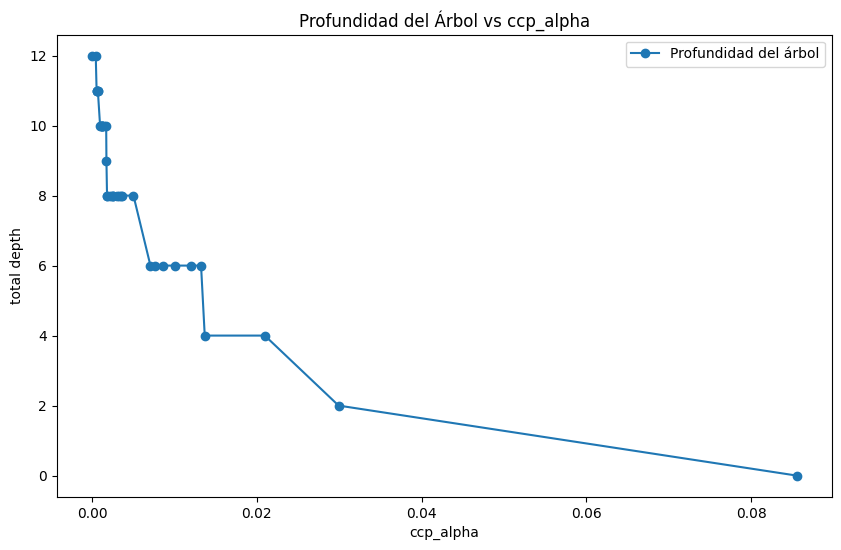

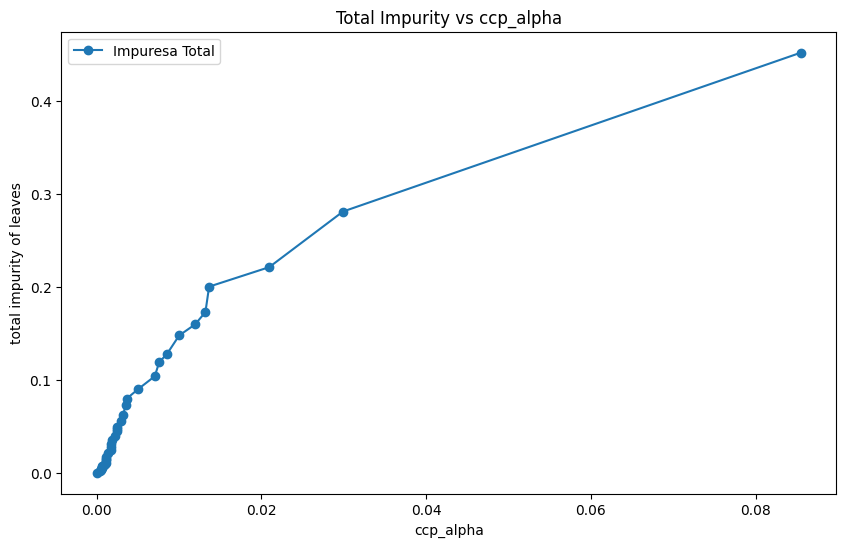

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, depths, label='Profundidad del árbol', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('total depth')
plt.legend()
plt.title('Profundidad del Árbol vs ccp_alpha')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, label='Impuresa Total', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('total impurity of leaves')
plt.legend()
plt.title('Total Impurity vs ccp_alpha')
plt.show()

Quan augmentem *cpp_alpha* es prioritza un model més simple, però això generalment augmenta la impuresa total perquè les fulles resultants tendeixen a agrupar diferents classes sense separar-les adequadament.

## D. Ensembles / Random Forests

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques. [Documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.


<font color= "blue"> Realment el mètode Random Forest és millor que un DecisionTreeClassifier convencional? Utilitza tots els mètodes i procediments explicats en aquesta classe per entrenar un DecisionTreeClassifier i un RandomForest amb el dataset *income_evaluation*. Al final de tot, cal mostrar les matrius de confusió per veure les prediccions dels dos mètodes amb les dades de test. </font>

Accuracy del Decision Tree: 0.8148
Accuracy del Random Forest: 0.8630


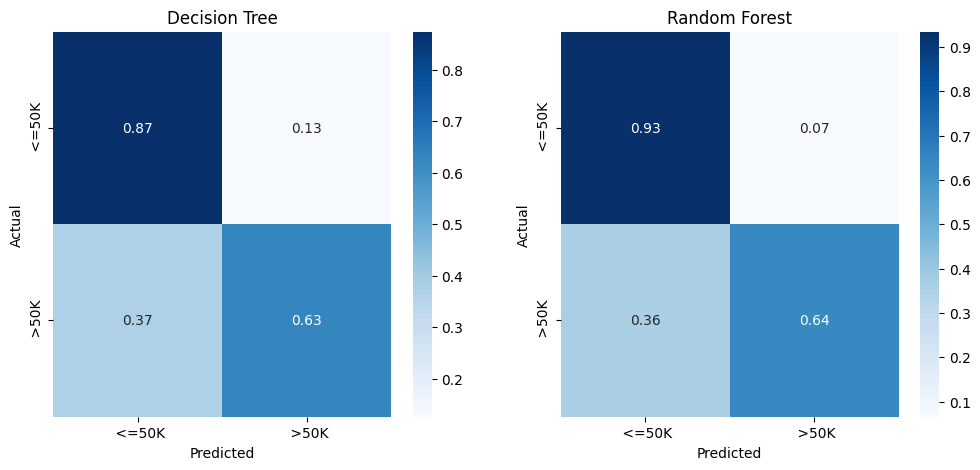

In [34]:
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

### Llegir el dataset
df = pd.read_csv('income_evaluation.csv')

### Definir X i y i fer el split en train i test
target = 'income'
y = df[target]
X = df.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Definim el codificador i ho apliquem al conjunt 'X'
ordinal_encoder = ce.OrdinalEncoder()
X_train_enc_ord = ordinal_encoder.fit_transform(X_train)
X_test_enc_ord = ordinal_encoder.transform(X_test)

### Utilitzem LabelEncoder per codificar 'y'
label_encoder = LabelEncoder()
y_train_enc_label = label_encoder.fit_transform(y_train)
y_test_enc_label = label_encoder.transform(y_test)

### Entrenem un DecisionTreeClassifier normal
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_enc_ord, y_train_enc_label)
y_pred_tree = dtree.predict(X_test_enc_ord)

# Entrenar Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_enc_ord, y_train_enc_label)
y_pred_forest = random_forest.predict(X_test_enc_ord)

acc_tree = accuracy_score(y_test_enc_label, y_pred_tree)
acc_forest = accuracy_score(y_test_enc_label, y_pred_forest)

print(f'Accuracy del Decision Tree: {acc_tree:.4f}')
print(f'Accuracy del Random Forest: {acc_forest:.4f}')

# Recuperem els noms originals utilitzant inverse_transform
y_test_labels = label_encoder.inverse_transform(y_test_enc_label)
y_pred_tree_labels = label_encoder.inverse_transform(y_pred_tree)
y_pred_forest_labels = label_encoder.inverse_transform(y_pred_forest)

unique_labels = label_encoder.classes_

# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# CM Decision Tree
sns.heatmap(confusion_matrix(y_test_labels, y_pred_tree_labels, normalize='true'), annot=True, fmt=".2f", ax=ax[0], cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
ax[0].set_title("Decision Tree")
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
# CM Random Forest
sns.heatmap(confusion_matrix(y_test_labels, y_pred_forest_labels, normalize='true'), annot=True, fmt=".2f", ax=ax[1], cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
ax[1].set_title("Random Forest")
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

<font color='blue'> Amb quin valor de *max_depth* obtenim millors resultats? Entrena models de Random Forest amb diferents valors de *max_depth* i fes la ROC Curve de cadascun. </font>

*Recorda que en el context de la corba ROC i l'AUC, utilitzem predict_proba en lloc de predict perquè necessitem les probabilitats estimades per a cada classe, no només les prediccions finals.*

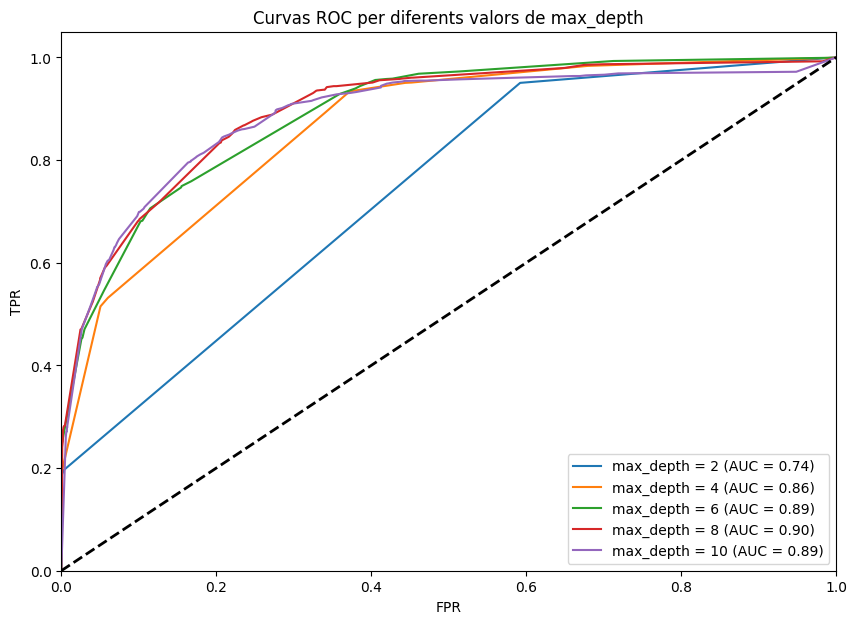

In [35]:
from sklearn.metrics import roc_curve, auc

max_depth_values = [2, 4, 6, 8, 10]
plt.figure(figsize=(10, 7))

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train_enc_ord, y_train_enc_label)

    y_prob = clf.predict_proba(X_test_enc_ord)
    
    fpr, tpr, thresholds = roc_curve(y_test_enc_label, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'max_depth = {max_depth} (AUC = {roc_auc:.2f})')

# Etiquetas y leyenda
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC per diferents valors de max_depth')
plt.legend(loc='lower right')
plt.show()

<font color= "blue"> Quin ensemble funciona millor amb el dataset *income_evaluation*? Entrena els mètodes *AdaBoostClassifier*, *ExtraTreesClassifier* i *GradientBoostingClassifier* amb les mateixes dades que has fet amb el Random Forest de l'exercici anterior i compara el accuracy dels 4 mètodes. </font>

In [36]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier, GradientBoostingClassifier

ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train_enc_ord, y_train_enc_label)
y_pred_ada = ada_boost.predict(X_test_enc_ord)
acc_ada = accuracy_score(y_test_enc_label, y_pred_ada)


extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train_enc_ord, y_train_enc_label)
y_pred_extra = extra_trees.predict(X_test_enc_ord)
acc_extra = accuracy_score(y_test_enc_label, y_pred_extra)

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_enc_ord, y_train_enc_label)
y_pred_gb = gradient_boosting.predict(X_test_enc_ord)
acc_gb = accuracy_score(y_test_enc_label, y_pred_gb)

print(f'Accuracy del AdaBoost: {acc_ada:.4f}')
print(f'Accuracy del ExtraTreesClassifier: {acc_extra:.4f}')
print(f'Accuracy del Random Forest: {acc_forest:.4f}')
print(f'Accuracy del Gradient Boosting: {acc_gb:.4f}')

c:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy del AdaBoost: 0.8640
Accuracy del ExtraTreesClassifier: 0.8498
Accuracy del Random Forest: 0.8630
Accuracy del Gradient Boosting: 0.8704
